In [1]:
import pyCompare as pc
import pandas as pd

In [2]:
!ls

'bland altman plot.ipynb'   ecgdata.csv   pytorch_stuff   requirements.txt


In [3]:
ecgdata = pd.read_csv("ecgdata.csv")

In [4]:
ecgdata.dropna(inplace=True)

In [5]:
ecgdata

,QTc1_MAC5000,QTc2_MAC5000,mean_MAC5000,QTc1_rhythmpad,QTc2_rhythmpad,mean_rhythmpad
0,421,421,421.0,394,398.0,396.0
1,440,436,438.0,404,408.0,406.0
2,462,472,467.0,410,395.0,402.5
3,413,390,401.5,378,365.0,371.5
4,411,407,409.0,403,399.0,401.0
5,442,442,442.0,424,402.0,413.0
6,431,444,437.5,418,432.0,425.0
7,449,442,445.5,448,415.0,431.5
9,445,440,442.5,400,401.0,400.5
10,425,442,433.5,435,418.0,426.5


In [6]:
ecgdata['diff']=ecgdata["QTc2_MAC5000"]-ecgdata["QTc2_rhythmpad"]
#We will use only the second QTc readings in our bland-altman plot 
#(rationale: any temporary increase in movement artifact and PR due to changing ECG machine likely to have reduced by second reading)

In [7]:
ecgdata[["QTc2_MAC5000","QTc2_rhythmpad","diff"]]

,QTc2_MAC5000,QTc2_rhythmpad,diff
0,421,398.0,23.0
1,436,408.0,28.0
2,472,395.0,77.0
3,390,365.0,25.0
4,407,399.0,8.0
5,442,402.0,40.0
6,444,432.0,12.0
7,442,415.0,27.0
9,440,401.0,39.0
10,442,418.0,24.0


In [8]:
ecgdata.drop([0,33], inplace=True)
# remove row 33 - the rhythmpad reading of 664 is clearly an error 
# (especially when you look at the first rhythmpad reading which is only 538) 


In [9]:
ecgdata[["QTc2_MAC5000","QTc2_rhythmpad","diff"]]

,QTc2_MAC5000,QTc2_rhythmpad,diff
1,436,408.0,28.0
2,472,395.0,77.0
3,390,365.0,25.0
4,407,399.0,8.0
5,442,402.0,40.0
6,444,432.0,12.0
7,442,415.0,27.0
9,440,401.0,39.0
10,442,418.0,24.0
11,527,403.0,124.0


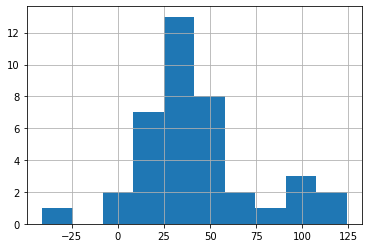

In [14]:
# demonstrate that the difference in means is normally distributed - an assumption of Bland Altman
ecgdata['diff'].hist()

In [10]:
qtcmac = ecgdata['QTc2_MAC5000']

In [11]:
qtcrhythmpad = ecgdata['QTc2_rhythmpad']

In [12]:
pc.blandAltman

<function pyCompare._plotBlandAltman.blandAltman(data1, data2, limitOfAgreement=1.96, confidenceInterval=95, confidenceIntervalMethod='approximate', percentage=False, detrend=None, title=None, figureSize=(10, 7), dpi=72, savePath=None, figureFormat='png', meanColour='#6495ED', loaColour='coral', pointColour='#6495ED')>

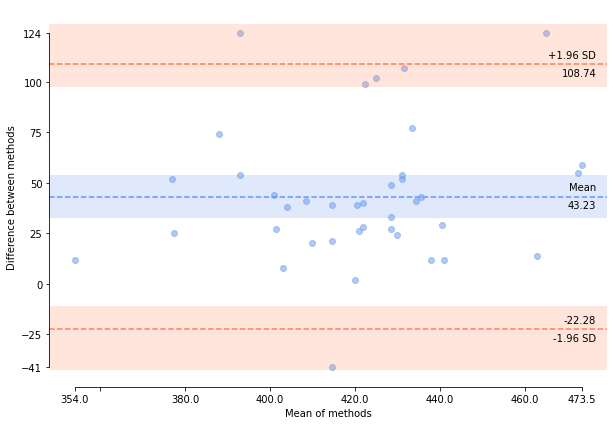

In [13]:
baplot = pc.blandAltman(qtcmac, qtcrhythmpad,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='exact paired',
            detrend=None,
            percentage=False)

**Mean difference** (or 'bias'): 43 msec. Note that 95% confidence intervals for the mean difference are shaded in blue (approx 34-55 msec). The bias is significant because the confidence interval for the mean does not include 0.  
**Limits of agreement**: -22 and 109, indicating that 95% of the differences between the two measurements are in this range. These limits of agreement themselves have 95% confidence intervals, shaded in coral. 